# semseg/train

based on [camvid.ipynb](./camvid.ipynb).

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import numpy as np
import torch
from abcli import fullname
from abcli import string
from abcli.modules import objects
from abcli.plugins import seed
from roofAI import NAME, VERSION
from roofAI.semseg.train import SemSegModelTrainer
from roofAI.semseg import Profile
import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{NAME}-{VERSION}.{fullname()}, built on {string.pretty_date()}")

Found credentials in shared credentials file: ~/.aws/credentials
/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
roofAI-3.25.1.abcli-7.2363.1-unknown, built on 11 October 2023, 21:17:40


In [2]:
profile = Profile.QUICK # FULL, QUICK, VALIDATION
dataset_object = "roofAI-CamVid-v2"
model_object = objects.unique_object("roofAI-CamVid-semseg-model")

📂 roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943


SemSegModelTrainer: /Users/kamangir/storage/abcli/roofAI-CamVid-v2/SegNet-Tutorial/CamVid/ -Profile.QUICK-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943
data review


Dataset: 20 item(s).


-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943/dataset.png


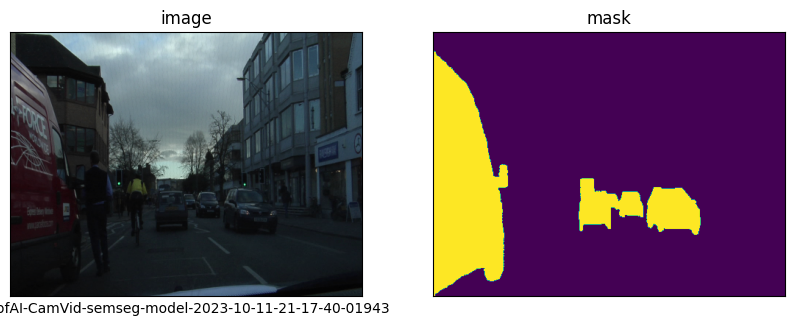

/usr/local/lib/python3.11/site-packages/albumentations/imgaug/transforms.py:261: FutureWarning: IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead
  warnings.warn("IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead", FutureWarning)
/usr/local/lib/python3.11/site-packages/albumentations/imgaug/transforms.py:384: FutureWarning: This IAAPerspective is deprecated. Please use Perspective instead
  warnings.warn("This IAAPerspective is deprecated. Please use Perspective instead", FutureWarning)
/usr/local/lib/python3.11/site-packages/albumentations/augmentations/transforms.py:1258: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/usr/local/lib/python3.11/site-packages/albumentations/imgaug/transforms.py:231: FutureWarning: IAASharpen is deprecated. Please use Sharpen instead
  warnings.warn("IAASharpen is deprecated. Please use Sharpen instead", FutureWarning)
/usr/local/lib/python3.11/site-packages/alb

Dataset: 20 item(s).


-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943/augmented_dataset-00000.png


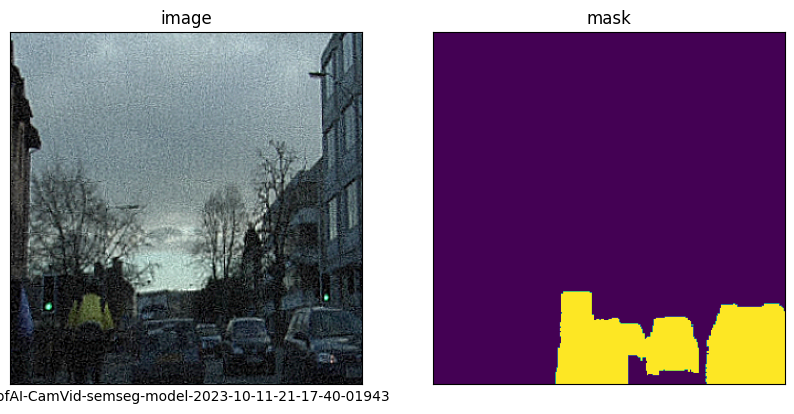

-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943/augmented_dataset-00001.png


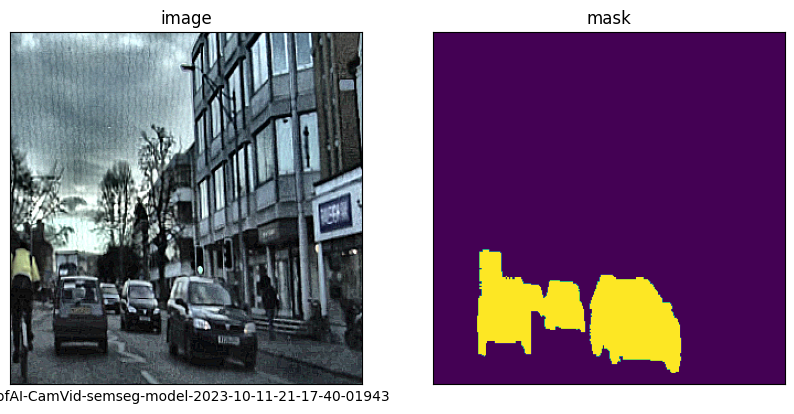

-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943/augmented_dataset-00002.png


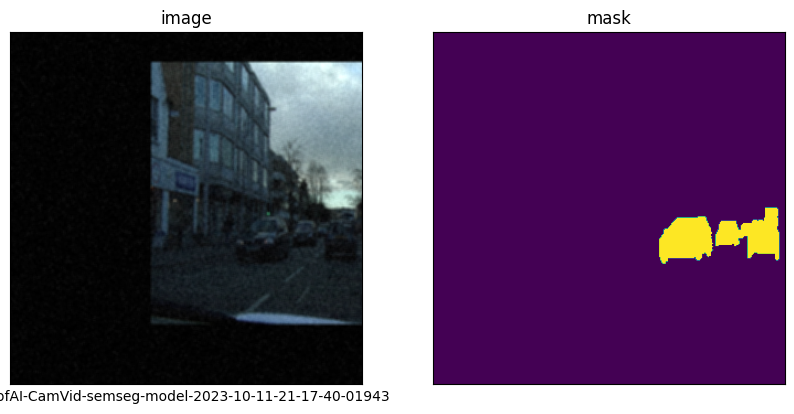

In [3]:
trainer = SemSegModelTrainer(
    dataset_path=objects.path_of(
        "SegNet-Tutorial/CamVid/", 
        object_name=dataset_object
    ),
    model_path=objects.object_path(object_name=model_object),
    in_notebook=True,
    profile=profile,
)

In [4]:
model = trainer.train()

SemSegModelTrainer.train -cpu:sigmoid-> se_resnext50_32x4d[imagenet]: car
epoch: #1/10


Dataset: 20 item(s).
Dataset: 20 item(s).
valid: 100%|██████████| 20/20 [00:16<00:00,  1.19it/s, dice_loss - 0.9612, iou_score - 0.01788]


-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943/model.pth
epoch: #2/10


valid: 100%|██████████| 20/20 [00:17<00:00,  1.15it/s, dice_loss - 0.9, iou_score - 0.06652]   


-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943/model.pth
epoch: #3/10


valid: 100%|██████████| 20/20 [00:17<00:00,  1.14it/s, dice_loss - 0.677, iou_score - 0.2961]  


-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943/model.pth
epoch: #4/10


valid: 100%|██████████| 20/20 [00:20<00:00,  1.02s/it, dice_loss - 0.6122, iou_score - 0.3179]


-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943/model.pth
epoch: #5/10


valid: 100%|██████████| 20/20 [00:17<00:00,  1.16it/s, dice_loss - 0.6586, iou_score - 0.2618]

epoch: #6/10



valid: 100%|██████████| 20/20 [00:17<00:00,  1.16it/s, dice_loss - 0.5859, iou_score - 0.3239]


-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943/model.pth
epoch: #7/10


valid: 100%|██████████| 20/20 [00:16<00:00,  1.19it/s, dice_loss - 0.5533, iou_score - 0.3621] 


-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943/model.pth
epoch: #8/10


valid: 100%|██████████| 20/20 [00:16<00:00,  1.22it/s, dice_loss - 0.6602, iou_score - 0.2874]  

epoch: #9/10



valid: 100%|██████████| 20/20 [00:16<00:00,  1.22it/s, dice_loss - 0.7014, iou_score - 0.2513]  

epoch: #10/10



valid: 100%|██████████| 20/20 [00:16<00:00,  1.23it/s, dice_loss - 0.6739, iou_score - 0.2702] 

SemSegModel.load(/Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943/model.pth): Profile.VALIDATION
SemSegModel: se_resnext50_32x4d[imagenet]-sigmoid-> car



Dataset: 20 item(s).
valid: 100%|██████████| 20/20 [00:15<00:00,  1.28it/s, dice_loss - 0.5738, iou_score - 0.3883]


In [5]:
%%bash -s $profile $model_object
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

profile=$1
model_object=$2

abcli select $model_object
abcli tag set . built_by_notebook

if [[ "$profile" != Profile.VALIDATION ]] ; then
    abcli upload

    abcli cache write \
            latest_CamVid_model $model_object
    abcli tag set \
        $model_object \
        CamVid,semseg
fi


📂 abcli: roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943


roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943 += #built_by_notebook.


confirmed: roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943 does not exist.
roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943 open upload started.
upload: ./abcli.log to s3://kamangir/bolt/roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943/abcli.log
upload: ./model.json to s3://kamangir/bolt/roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943/model.json
upload: ./augmented_dataset-00002.png to s3://kamangir/bolt/roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943/augmented_dataset-00002.png
upload: ./dataset.png to s3://kamangir/bolt/roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943/dataset.png
upload: ./augmented_dataset-00000.png to s3://kamangir/bolt/roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943/augmented_dataset-00000.png
upload: ./augmented_dataset-00001.png to s3://kamangir/bolt/roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943/augmented_dataset-00001.png
upload: ./model.pth to s3://kamangir/bolt/roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943/model.p

roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943 += #open.
cache[latest_CamVid_model] <- roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943
roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943 += #CamVid.
roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943 += #semseg.


In [6]:
seed.log(model_object)

-abcli.plugins.seed: seed: log(roofAI-CamVid-semseg-model-2023-10-11-21-17-40-01943): target not found.


In [7]:
# END